In [14]:
import numpy as np 
import matplotlib.pyplot as plt

In [21]:
rng = np.random.default_rng() 

def monte_carlo_pi(numero_pontos):
    """
    Estima o valor de π usando o método de Monte Carlo.

    O método gera pontos aleatórios dentro do quadrado unitário [0,1] × [0,1] e conta quantos 
    desses pontos caem dentro do quarto de círculo de raio 1. A proporção de pontos dentro 
    do círculo é usada para estimar π.

    Parâmetros:
    numero_pontos :
        O número de pontos aleatórios a serem gerados para a estimativa.
    Retorna:
        A estimativa do valor de π baseada nos pontos gerados.
    """
    dentro_circulo = 0
    for _ in range(numero_pontos):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if x**2 + y**2 <= 1:
            dentro_circulo += 1
    return 4 * dentro_circulo / numero_pontos

numero_pontos = 100000
pi = monte_carlo_pi(numero_pontos)
erro = (pi - np.pi) / np.pi

print("Valor estimado de π:", pi)
print("Valor real de π:", np.pi)
print("Erro relativo:", erro)

Valor estimado de π: 3.1398
Valor real de π: 3.141592653589793
Erro relativo: -0.000570619360133964


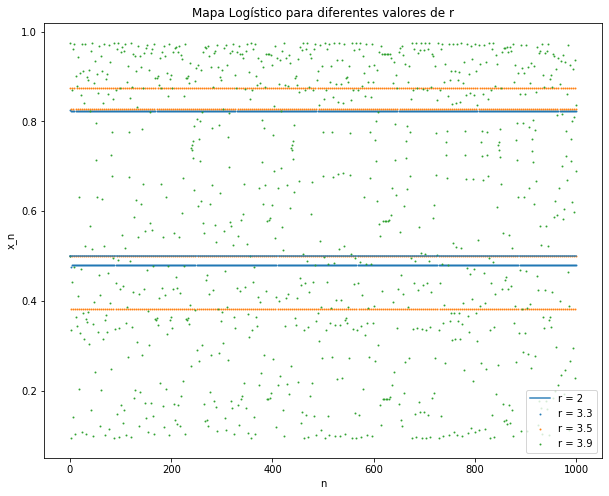

In [31]:
def mapa_logistico(r, x0, N):
    """
    Calcula a sequência do mapa logístico.

    Parâmetros:
        r: Taxa de crescimento
        x0: Condição inicial (0 < x0 < 1)
        N: Número de iterações

    Retorna:
        Lista dos valores de x ao longo das iterações.
    """
    x_values = [x0]
    x = x0
    for _ in range(N):
        x = r * x * (1 - x)
        x_values.append(x)
    return x_values

# Parâmetros
N = 1000  # Número de iterações
x0 = 0.5  # Condição inicial
r_values = [2, 3.3, 3.5, 3.9]  # Valores de r para análise

# Gráficos
plt.figure(figsize=(10, 8))
n_values = np.arange(N + 1)

for r in r_values:
    x_values = mapa_logistico(r, x0, N)
    if r == 2:
        plt.plot(n_values, x_values, label=f"r = {r}", linestyle='-', alpha=0.9)
    else:
        plt.scatter(n_values, x_values, label=f"r = {r}", s=1, alpha=0.9)

plt.xlabel("n")
plt.ylabel("x_n")
plt.title("Mapa Logístico para diferentes valores de r")
plt.legend()
plt.show()


In [12]:
%timeit monte_carlo_pi

24.2 ns ± 0.0547 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


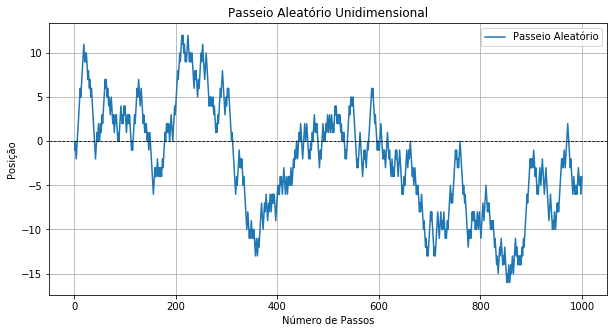

In [10]:
def random_walk_1D(N=1000, p=0.5):
    """
    Simula um passeio aleatório unidimensional.
    
    Parâmetros:
    N (int): Número de passos.
    p (float): Probabilidade de ir para a direita.
    
    Retorna:
    np.array: Posições do caminhante ao longo do tempo.
    """
    passos = np.where(np.random.rand(N) < p, 1, -1)  # Define passos +1 (direita) ou -1 (esquerda)
    posicoes = np.cumsum(passos)  # Soma cumulativa para obter posição
    return posicoes

# Definir parâmetros
N = 1000
p = 0.5


# Gerar passeio aleatório
posicoes = random_walk_1D(N, p)

# Plotar o gráfico
tempo = np.arange(1, N+1)
plt.figure(figsize=(10, 5))
plt.plot(tempo, posicoes, label='Passeio Aleatório')
plt.xlabel('Número de Passos')
plt.ylabel('Posição')
plt.title('Passeio Aleatório Unidimensional')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()